### Nulte vježbe iz NMA (Numeričke metode u astronomiji), datum: 10.10.2024.

### 1. Studenti treba da instaliraju $\textit{anacondu}$.
### 2. Studenti treba da naprave novo okruženje na sopstvenim mašinama.

### $\color{magenta}{\text{Kratak UVOD u python i osnovne operacije povezane sa astronomijom}} $

### a) Kreiranje i čuvanje fajla sa podacima

In [61]:
import numpy as np

# Kreiramo jednostavan 2D niz podataka (npr. magnitude zvijezda u različitim filterima)
# Generišemo slučajne apsolutne magnitude, a zatim izračunavamo prividne magnitude na osnovu distance

broj_zvijezda = 50
ID = np.arange(1, broj_zvijezda + 1)  # ID zvijezda
distance = np.random.uniform(10, 1000, broj_zvijezda)  # Distance u parsecima

# Generisanje slučajnih apsolutnih magnituda (M) za U, B, V filtere

abs_magnituda_U = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u U filteru
abs_magnituda_B = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u B filteru
abs_magnituda_V = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u V filteru

# Prividna magnituda (m)

magnituda_U = abs_magnituda_U + 5 * np.log10(distance) - 5
magnituda_B = abs_magnituda_B + 5 * np.log10(distance) - 5
magnituda_V = abs_magnituda_V + 5 * np.log10(distance) - 5

podaci = np.column_stack((ID, distance, magnituda_U, magnituda_B, magnituda_V))

# Čuvamo podatke u CSV fajlu

np.savetxt('magnitude_zvijezda.csv', podaci, delimiter=',', header='ID,Distance,U,B,V',
           comments='', fmt='%.1f')

print('Podaci za 50 zvijezda su sačuvani u fajlu magnitude_zvijezda.csv')

Podaci za 50 zvijezda su sačuvani u fajlu magnitude_zvijezda.csv


### Formula za magnitude korišćena u prethodnom dijelu je:
### $m = M + 5 \cdot \log_{10}(d_{pc}) - 5$.
### Što se tiče numpy.random.uniform, raspodjela vjerovatnoće je:
### $p(x)=\frac{1}{b-a}$,
### gdje su a i b granice izabranog intervala.

### b) Učitavanje podataka iz gorepomenutog fajla

In [62]:
# Učitavamo podatke iz CSV fajla

ucitani_podaci = np.loadtxt('magnitude_zvijezda.csv', delimiter=',', skiprows=1)

# Prikazujemo učitane podatke
print("Učitani podaci iz fajla 'magnitude_zvijezda.csv':")
print(ucitani_podaci)

Učitani podaci iz fajla 'magnitude_zvijezda.csv':
[[ 1.000e+00  8.914e+02  1.120e+01  8.800e+00  9.200e+00]
 [ 2.000e+00  4.489e+02  5.000e+00  3.300e+00  4.700e+00]
 [ 3.000e+00  9.427e+02  1.280e+01  1.270e+01  1.420e+01]
 [ 4.000e+00  5.538e+02  1.330e+01  5.400e+00  1.220e+01]
 [ 5.000e+00  3.275e+02  9.700e+00  5.100e+00  9.700e+00]
 [ 6.000e+00  6.779e+02  7.900e+00  4.700e+00  6.400e+00]
 [ 7.000e+00  6.409e+02  5.100e+00  7.200e+00  1.040e+01]
 [ 8.000e+00  4.924e+02  4.000e+00  1.060e+01  6.000e+00]
 [ 9.000e+00  8.985e+02  1.440e+01  1.270e+01  7.200e+00]
 [ 1.000e+01  3.690e+02  6.100e+00  1.250e+01  3.400e+00]
 [ 1.100e+01  5.125e+02  4.000e+00  6.600e+00  5.200e+00]
 [ 1.200e+01  7.326e+02  1.180e+01  9.600e+00  4.600e+00]
 [ 1.300e+01  5.098e+02  8.700e+00  4.800e+00  1.240e+01]
 [ 1.400e+01  9.183e+02  6.100e+00  8.900e+00  1.000e+01]
 [ 1.500e+01  2.172e+02  5.800e+00  1.700e+00  8.600e+00]
 [ 1.600e+01  7.313e+02  1.190e+01  6.000e+00  1.320e+01]
 [ 1.700e+01  8.240e+0

### c) Plotovanje podataka

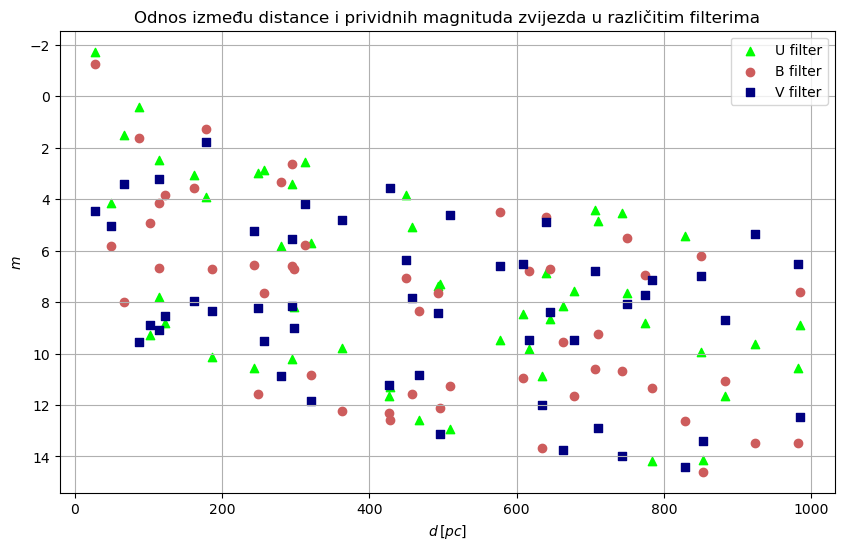

In [56]:
import matplotlib.pyplot as plt

# Plotovanje odnosa distance i magnituda

plt.figure(figsize=(10, 6))
plt.scatter(distance, magnituda_U, label='U filter', color='lime', marker='^')
plt.scatter(distance, magnituda_B, label='B filter', color='indianred', marker='o')
plt.scatter(distance, magnituda_V, label='V filter', color='navy', marker='s')

# Dodajemo naslove, labele, legendu...

plt.title('Odnos između distance i prividnih magnituda zvijezda u različitim filterima')
plt.xlabel(r'$d\,[pc]$')
plt.ylabel(r'$m$')
plt.gca().invert_yaxis()  # Inverzna skala za magnitude
plt.legend()
plt.grid(True)
plt.show()

### d) Pristup određenim podacima iz našeg primjera 

In [57]:
print(ucitani_podaci[1, :])  # sve informacije o drugoj zvijezdi

[  2.   639.75   6.87   4.7    4.87]


In [60]:
print(ucitani_podaci[4, 3]) # B magnituda pete zvijezde

3.83


### $\color{cyan}{\text{Nizovi u pythonu}} $

### Evo primjera za neki 2D niz

In [133]:
# Podaci za asteroide: prečnik (km), udaljenost od Sunca (AU), brzina (km/s)

precnici = np.random.uniform(1, 100, 5)  # 5 asteroida sa prečnicima između 1 i 100 km
udaljenosti = np.random.uniform(0.5, 5, 5)  # Udaljenosti između 0.5 i 5 AU
brzine = np.random.uniform(5, 30, 5)  # Brzine između 5 i 30 km/s

# Kreirajmo 2D niz gdje svaki red sadrži podatke o jednom asteroidu
asteroidi_2d = np.column_stack((precnici, udaljenosti, brzine))

print('Dimenzije su:', asteroidi_2d.shape)
print('2D niz - podaci o asteroidima (prečnik, udaljenost, brzina):')
print(asteroidi_2d)

Dimenzije su: (5, 3)
2D niz - podaci o asteroidima (prečnik, udaljenost, brzina):
[[18.95393645  3.48066626  5.22471688]
 [79.77241872  1.4309071  21.69732325]
 [84.99422396  4.04048258 16.18590074]
 [ 9.83995017  3.1157732   8.91798494]
 [27.37724106  4.05737216 29.74631093]]


### Prelazimo na 3D niz

In [77]:
# Podaci za asteroide: prečnik, udaljenost, brzina za određene vremenske trenutke

# 5 asteroida, posmatranih u 3 vremenske tačke
broj_asteroida = 5
vremenski_trenutak = 3

# Nasumični podaci za svaki vrmemenski trenutak (prečnici, udaljenosti, brzine)
precnici = np.random.uniform(1, 100, (vremenski_trenutak, broj_asteroida))
udaljenosti = np.random.uniform(0.5, 5, (vremenski_trenutak, broj_asteroida))
brzine = np.random.uniform(5, 30, (vremenski_trenutak, broj_asteroida))

# 3D niz: Svaki vremenski trenutak sadrži 2D podatke o asteroidima (prečnik, udaljenost, brzina)
asteroidi_3d = np.stack((precnici, udaljenosti, brzine), axis=2)

print("3D niz - podaci o asteroidima tokom 3 vremenska trenutka:")
print(asteroidi_3d)

3D niz - podaci o asteroidima tokom 3 vremenska trenutka:
[[[62.82910465  2.72654059 23.68797503]
  [42.75538611  1.77941824 15.85809856]
  [24.77209389  4.96540997 27.52244943]
  [49.95796595  2.81715921 14.91550804]
  [44.01128336  3.52889056  8.61078985]]

 [[ 6.98310906  1.79603089 22.16239249]
  [66.37140189  1.60933414  5.24594369]
  [26.4684037   2.38763151  5.14457165]
  [10.81097873  4.41822251 29.99810562]
  [ 8.61739735  3.1003539  28.32438999]]

 [[61.84542649  4.4737175  22.19139357]
  [76.7510062   4.7344807  11.22768711]
  [45.63397368  1.25582308 26.78000471]
  [40.18442065  3.11882441 14.08671958]
  [15.97705959  0.54387784 17.24814556]]]


### Provjera dimenzije niza i plotovanje

In [91]:
print(asteroidi_3d.shape)

(3, 5, 3)


### Primjer: plotujemo brzine za svih pet asteroida u drugom vremenskom trenutku

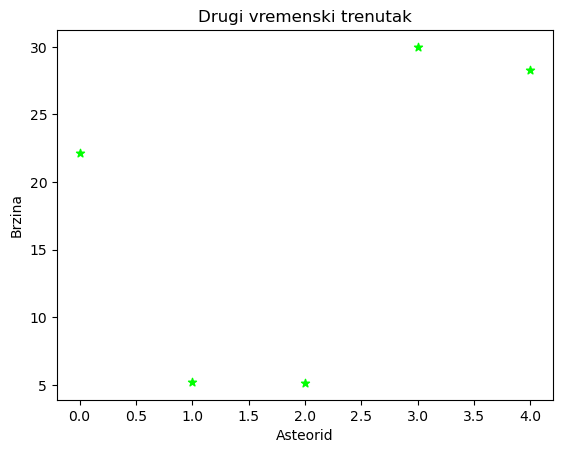

In [129]:
plt.scatter(range(asteroidi_3d.shape[1]), asteroidi_3d[1, :, 2], marker='*', color='lime')
plt.xlabel('Asteorid')
plt.ylabel('Brzina')
plt.title('Drugi vremenski trenutak')
plt.grid(False)
plt.show()

### $\color{indianred}{\text{ZADACI}} $

### 1. Napraviti numerički niz od 1 do 100 sa korakom 0.1
### 2. Napraviti numerički niz od 1 do 100 (bez 100) sa 700 elemenata
### 3. U monotono rastućem nizu pronaći sve elemente koji su veći od 
### neke vrijednosti a1 i manji od neke vrednosti a2.
### 4. U fajlu Atens.dat pronaći sve asteroide čija je velika poluosa 
### između 0.8 i 0.9 AJ i/ili ekscentričnost orbite između 0.2 i 0.3.

### $\color{indianred}{\text{RJEŠENJA}} $

### 1. zadatak

In [80]:
niz1 = np.arange(1, 100.1, 0.1)  # Početak je 1, kraj je 100.1 (kako bi uključili 100), korak je 0.1

### 2. zadatak

In [81]:
# Niz od 1 do 100 (bez 100) sa 700 elemenata
niz2 = np.linspace(1, 100, 700, endpoint=False)  # endpoint=False isključuje krajnju vrednost 100

### 3. zadatak

In [82]:
# Kreirajmo monotono rastući niz
monotoni_niz = np.arange(1, 101)  # Niz od 1 do 100

# Definišemo granice
a1 = 30
a2 = 70

# Pronađimo sve elemente koji su veći od a1 i manji od a2
selektovani_elementi = monotoni_niz[(monotoni_niz > a1) & (monotoni_niz < a2)]
print(selektovani_elementi)

[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


### 4. zadatak

### DOMAĆI...